# СОЗДАНИЕ МОДЕЛЕЙ 

In [65]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats 
import seaborn as sns

import sklearn
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, SGDRegressor, ARDRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer, OrdinalEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import plotly.express as px
from scipy import stats
from scipy.stats import ttest_ind
import pickle
import io

%matplotlib inline

In [66]:
# загрузка и просмотр датасета
#df = pd.read_excel('../data/processed/df.xlsx', index_col=0)
df = pd.read_excel('../data/processed/df_clean.xlsx', index_col=0)
#df = pd.read_excel('../data/processed/df_prep.xlsx', index_col=0)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


# Модуль упругости при растяжении и Прочность при растяжении

In [67]:
# хранение оценок моделей
MAE_Emod=[] # средняя абсолютная ошибка - Модуль упругости при растяжении
R2_Emod=[] # коэффициент детерминации - Модуль упругости при растяжении

MAE_Rm=[] # средняя абсолютная ошибка - Прочность при растяжении
R2_Rm=[] # коэффициент детерминации - Прочность при растяжении

In [68]:
# выделение целевых переменных
y = df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']]
y_Emod = df[['Модуль упругости при растяжении, ГПа']]
y_Rm = df[['Прочность при растяжении, МПа']]
y.head()

,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
1,70.0,3000.0
3,70.0,3000.0
4,70.0,3000.0
5,70.0,3000.0
6,70.0,3000.0


In [69]:
X = df.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
X.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,70.0


In [70]:
# разбиение данных на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)

In [71]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
X_norm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
y_norm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [109]:
# разбиение нормализованных данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, 
                                                                        test_size=0.3, random_state=42, shuffle=True)

In [73]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(645, 11)
(277, 11)
(645, 2)
(277, 2)


Ridge regression

In [74]:
# Гиперпараметры для поиска по сетке
params = [{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

In [75]:
# Поиск по сетке с перекрестной проверкой
modelRidge = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=modelRidge, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)
cv.fit(X_train_norm,y_train_norm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [76]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 20, 'solver': 'sag'}
Лучший средний балл перекрестной проверки:
-0.18973622848641228


In [83]:
# Модель линейной регрессии Ridge
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

modelRidge = Ridge(alpha=alpha, solver=solver)
modelRidge.fit(X_train_norm,y_train_norm)
y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
MAE_Ridge_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Ridge_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Ridge_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Ridge_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Ridge_Emod)
print (MAE_Ridge_Rm)
print (R2_Ridge_Emod)
print (R2_Ridge_Rm)

2.599839610820276
369.8853637657098
-0.017624547223823228
0.00041233130208528923


In [79]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Ridge',MAE_Ridge_Emod])
MAE_Rm.append(['Ridge',MAE_Ridge_Rm])
R2_Emod.append(['Ridge',R2_Ridge_Emod])
R2_Rm.append(['Ridge',R2_Ridge_Rm])

Lasso regression

In [89]:
# модель линейной регрессии Lasso
modelLasso = Lasso(alpha=0.001)
modelLasso.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelLasso.predict(X_test_norm))
MAE_Lasso_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Lasso_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Lasso_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Lasso_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Lasso_Emod)
print (MAE_Lasso_Rm)
print (R2_Lasso_Emod)
print (R2_Lasso_Rm)

2.5948108078737024
368.9355592328838
-0.018703787461314736
0.0033815533408245724


In [90]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Lasso',MAE_Lasso_Emod])
MAE_Rm.append(['Lasso',MAE_Lasso_Rm])
R2_Emod.append(['Lasso',R2_Lasso_Emod])
R2_Rm.append(['Lasso',R2_Lasso_Rm])

ElasticNet regression

In [94]:
# модель линейной регрессии ElasticNet
modelElastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
modelElastic.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelElastic.predict(X_test_norm))
MAE_Elastic_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Elastic_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Elastic_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Elastic_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Elastic_Emod)
print (MAE_Elastic_Rm)
print (R2_Elastic_Emod)
print (R2_Elastic_Rm)

2.5801929025662833
368.8669394882762
-0.00887867080603466
-5.703200261408803e-05


In [95]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Elastic',MAE_Elastic_Emod])
MAE_Rm.append(['Elastic',MAE_Elastic_Rm])
R2_Emod.append(['Elastic',R2_Elastic_Emod])
R2_Rm.append(['Elastic',R2_Elastic_Rm])

GradientBoostingRegressor

In [97]:
# модель регрессии GradientBoostingRegressor
modelGBR_Emod = GradientBoostingRegressor()
modelGBR_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelGBR_Emod.predict(X_test_norm)
modelGBR_Rm = GradientBoostingRegressor()
modelGBR_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelGBR_Rm.predict(X_test_norm)
y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_GBR_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_GBR_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_GBR_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_GBR_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_GBR_Emod)
print (MAE_GBR_Rm)
print (R2_GBR_Emod)
print (R2_GBR_Rm)

2.6910083963059543
383.5348939004645
-0.11541484837978566
-0.05587015746767254


In [98]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['GBR',MAE_GBR_Emod])
MAE_Rm.append(['GBR',MAE_Elastic_Rm])
R2_Emod.append(['GBR',R2_GBR_Emod])
R2_Rm.append(['GBR',R2_GBR_Rm])

KNeighborsRegressor

In [ ]:
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_norm)
modelNeihg_2 = KNeighborsRegressor()
modelNeihg_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Neihg_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Neihg_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)
print (R2Neihg_1)
print (R2Neihg_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['KNeighborsRegressor_norm',MAENeihg_1])
MAE_y2.append(['KNeighborsRegressor_norm',MAENeihg_2])
R2_y1.append(['KNeighborsRegressor_norm',R2Neihg_1])
R2_y2.append(['KNeighborsRegressor_norm',R2Neihg_2])

DecisionTreeRegressor

In [ ]:
# модель регрессии DecisionTreeRegressor
modelTree_1 = DecisionTreeRegressor(max_depth=3)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Tree_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Tree_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)
print (R2Tree_1)
print (R2Tree_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['DecisionTreeRegressor_norm',MAETree_1])
MAE_y2.append(['DecisionTreeRegressor_norm',MAETree_2])
R2_y1.append(['DecisionTreeRegressor_norm',R2Tree_1])
R2_y2.append(['DecisionTreeRegressor_norm',R2Tree_2])


RandomForestRegressor

In [ ]:
# модель регрессии RandomForestRegressor
modelForest_1 = RandomForestRegressor(max_depth=5)
modelForest_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelForest_1.predict(X_test_norm)

modelForest_2 = RandomForestRegressor(max_depth=5)
modelForest_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelForest_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEForest_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEForest_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Forest_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Forest_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEForest_1)
print (MAEForest_2)
print (R2Forest_1)
print (R2Forest_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['RandomForestRegressor_norm',MAEForest_1])
MAE_y2.append(['RandomForestRegressor_norm',MAEForest_2])
R2_y1.append(['RandomForestRegressor_norm',R2Forest_1])
R2_y2.append(['RandomForestRegressor_norm',R2Forest_2])

AdaBoostRegressor

In [ ]:
# модель регрессии AdaBoostRegressor
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_1 = modelAda_1.predict(X_test_norm)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_2 = modelAda_2.predict(X_test_norm)

y_pred = np.vstack((y_pred_1,y_pred_2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Ada_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Ada_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)
print (R2Ada_1)
print (R2Ada_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['AdaBoostRegressor_norm',MAEAda_1])
MAE_y2.append(['AdaBoostRegressor_norm',MAEAda_2])
R2_y1.append(['AdaBoostRegressor_norm',R2Ada_1])
R2_y2.append(['AdaBoostRegressor_norm',R2Ada_2])

Полносвязная нейронная сеть

In [ ]:
# модель полносвязной нейронной сети для целевого параметра y1
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1.add(Dropout(0.5))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'tanh'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [ ]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на нормализованных данных
modelNN_y1_1 = Sequential()
modelNN_y1_1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1_1.add(Dropout(0.5))
modelNN_y1_1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1_1.add(Dense(1, activation = 'relu'))
modelNN_y1_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1_1.summary()
history = modelNN_y1_1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [ ]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на нормализованных данных
modelNN_y1_2 = Sequential([
                Dense(32,  input_dim=11, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(64, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(32, activation = 'sigmoid'),
                Dense(16, activation = 'sigmoid'),
                Dense(1, activation = 'linear')])
modelNN_y1_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1_2.summary()
history = modelNN_y1_2.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [ ]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на нормализованных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y2.add(Dropout(0.5))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'tanh'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=50, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [ ]:
y_pred_1 = modelNN_y1.predict(X_test_norm)
y_pred_2 = modelNN_y2.predict(X_test_norm)

y_pred = np.hstack((y_pred_1,y_pred_2))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAE_NN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_NN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAE_NN_1)
print (MAE_NN_2)

R2_NN_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_NN_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (R2_NN_1)
print (R2_NN_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['NeuralNetwork_norm',MAENN_1])
MAE_y2.append(['NeuralNetwork_norm',MAENN_2])


MAE_y1.append(['AdaBoostRegressor_norm',MAEAda_1])
MAE_y2.append(['AdaBoostRegressor_norm',MAEAda_2])
R2_y1.append(['AdaBoostRegressor_norm',R2Ada_1])
R2_y2.append(['AdaBoostRegressor_norm',R2Ada_2])

In [105]:
# Результаты - Модуль упругости при растяжении
a = np.array(MAE_Emod)
b = np.array(R2_Emod)

Emod_errors = pd.DataFrame({'Модель регрессии для модуля упругости при растяжении': a[:,0], 'MAE': a[:,1], 'R2': b[:,1]})
Emod_errors

,Модель регрессии для модуля упругости при растяжении,MAE,R2
0,Ridge,2.599755688208548,-0.01757441550725103
1,Lasso,2.5948108078737024,-0.018703787461314736
2,Elastic,2.5801929025662833,-0.00887867080603466
3,Elastic,2.5801929025662833,-0.00887867080603466
4,GBR,2.6910083963059543,-0.11541484837978566


In [106]:
# Результаты - Прочность при растяжении
c = np.array(MAE_Rm)
d = np.array(R2_Rm)

Rm_errors = pd.DataFrame({'Модель регрессии для прочности при растяжении': c[:,0], 'MAE': c[:,1], 'R2': d[:,1]})
Rm_errors

,Модель регрессии для прочности при растяжении,MAE,R2
0,Ridge,369.87929751019243,0.0004361771126409897
1,Lasso,368.9355592328838,0.0033815533408245724
2,Elastic,368.8669394882762,-5.703200261408803e-05
3,Elastic,368.8669394882762,-5.703200261408803e-05
4,GBR,368.8669394882762,-0.05587015746767254


In [ ]:

#Линейная регрессия
#SVM (метод опорных векторов)
#KNN (метод k-ближайших соседей)
#Дерево решений
#Random Forest
#Наивный байесовский классификатор
#AdaBoost, или адаптивный бустинг
#Gradient Boost и XGBoost
#LightGBM
#Нейросетевая регрессия
#Регрессия LASSO
#Гребневая регрессия (ридж-регрессия)
#Регрессия ElasticNet



In [ ]:
# Поиск лучших гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
n_estimators = [3,5,9,11]
max_depth = [1,2,3,4,5]
min_samples_split = [10,20,30]
min_samples_leaf = [2,4,6]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfr, param_grid, cv = 10, verbose = 1, n_jobs=1)
gs.fit(X_train, y_train)
gs.best_params_



parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 12],
    'min_samples_split': [2, 6, 10],
}
roc_auc_ovr = make_scorer(roc_auc_score, multi_class='ovr')

clf = GridSearchCV(
    RandomForestClassifier(), parameters, cv=5, scoring=roc_auc_ovr
)

clf.fit(x_train, y_train)

print(f'Лучшие параметры: {clf.best_params_}')

best_r_tree = clf.best_estimator_

In [11]:
#Какую модель использовать? Нужно попробовать разные. Для сравнения моделей использую несколько метрик. Для статистической устойчивости результатов использую кросс-валидацию. Оформлю запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.
#

# функция запуска разных моделей и оценки метрик
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=42)
    scoring = ['r2', 
                'neg_root_mean_squared_error', 
                'neg_mean_squared_error', 
                'neg_mean_absolute_error', 
                'max_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MSE'] = scores['test_neg_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
        
    return stat

#  mean_squared_error, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, ConfusionMatrixDisplay

# функция поиска гиперпараметров по сетке с перекрестной проверкой
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=42)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

# функция получения метрик предсказания#
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = r2_score(y, y_pred) * -1
    stat.loc[model_name, 'RMSE'] = mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MSE'] = mean_squared_error(y, y_pred) * -1
    stat.loc[model_name, 'MAE'] = mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = max_error(y, y_pred) * -1
    return stat

#Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.
#

In [12]:
models_Emodulus = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

stat_Emodulus = run_models(models_Emodulus, X_Emod_train, y_Emod_train)
stat_Emodulus.style.highlight_max(axis=0)

,R2,RMSE,MSE,MAE,max_error
DummyRegressor,-0.005978,-0.192077,-0.037075,-0.155175,-0.469435
LinearRegression,-0.026962,-0.194009,-0.037823,-0.157524,-0.474872
Ridge,-0.025137,-0.193842,-0.037758,-0.157360,-0.474475
Lasso,-0.005978,-0.192077,-0.037075,-0.155175,-0.469435
SVR,-0.260346,-0.214443,-0.046292,-0.171644,-0.530305
SGDRegressor,-0.038863,-0.195018,-0.038205,-0.157281,-0.477417
KNeighborsRegressor,-0.215760,-0.211106,-0.044857,-0.171461,-0.530524
DecisionTreeRegressor,-1.157739,-0.280421,-0.078979,-0.226275,-0.715184
RandomForestRegressor,-0.077519,-0.198720,-0.039769,-0.161142,-0.481209


In [13]:
models_Rm = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

stat_Rm = run_models(models_Rm, X_Rm_train, y_Rm_train)
stat_Rm.style.highlight_max(axis=0)

,R2,RMSE,MSE,MAE,max_error
DummyRegressor,-0.008783,-0.186579,-0.034966,-0.149120,-0.467456
LinearRegression,-0.038337,-0.189316,-0.036021,-0.151587,-0.470897
Ridge,-0.036112,-0.189113,-0.035942,-0.151400,-0.470655
Lasso,-0.008783,-0.186579,-0.034966,-0.149120,-0.467456
SVR,-0.226356,-0.205477,-0.042641,-0.163493,-0.525318
SGDRegressor,-0.108385,-0.195252,-0.038267,-0.157282,-0.495832
KNeighborsRegressor,-0.186228,-0.202158,-0.041295,-0.159284,-0.527324
DecisionTreeRegressor,-1.079926,-0.267110,-0.071800,-0.217158,-0.654926
RandomForestRegressor,-0.056142,-0.190987,-0.036742,-0.153408,-0.471329


In [ ]:
from sklearn.metrics import roc_auc_score, make_scorer, ConfusionMatrixDisplay, precision_recall_fscore_support, mean_squared_error, confusion_matrix

In [15]:
# Предсказание базовой модели
base_model_Emodulus = DummyRegressor(strategy='mean')
base_model_Emodulus.fit(X_Emod_train, y_Emod_train)
y_Emodulus_pred_base = base_model_Emodulus.predict(X_Emod_test)

In [16]:
# Предсказание лучшей модели
best_model_Emodulus = RandomForestRegressor(max_depth=2, max_features=1, n_estimators=75)
best_model_Emodulus.fit(X_Emod_train, y_Emod_train)
y_Emodulus_pred_best = best_model_Emodulus.predict(X_Emod_test)

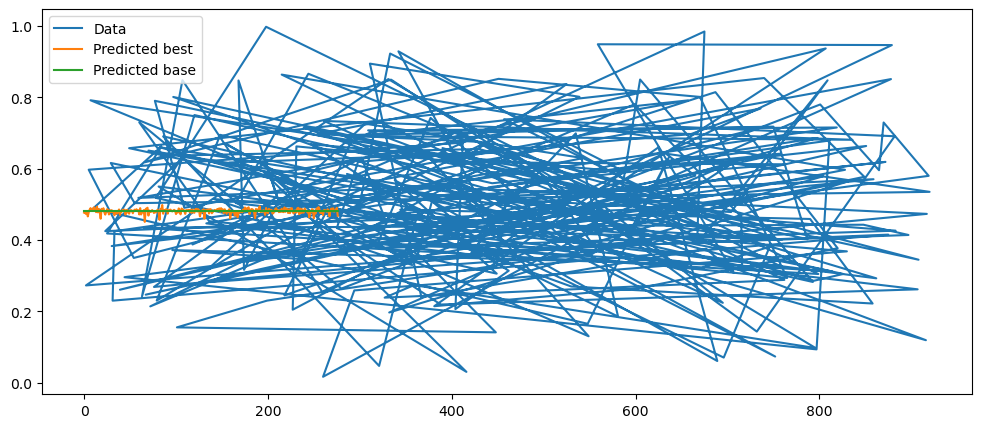

In [17]:
# Сравнение
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_Emod_test, label='Data')
ax.plot(y_Emodulus_pred_best, label='Predicted best')
ax.plot(y_Emodulus_pred_base, label='Predicted base')
ax.legend()
plt.show()

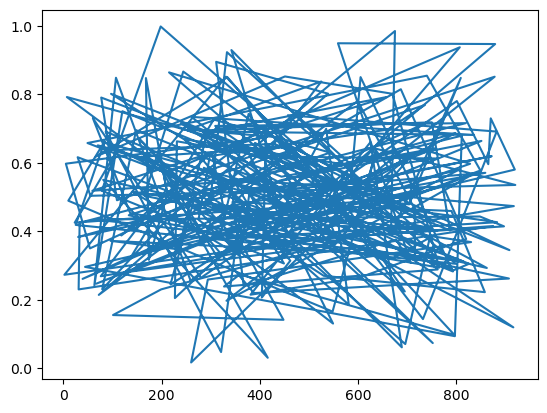

In [21]:
plt.plot(y_Emod_test)

In [18]:
# Предсказание базовой модели
base_model_Rm = DummyRegressor(strategy='mean')
base_model_Rm.fit(X_Rm_train, y_Rm_train)
y_Rm_pred_base = base_model_Rm.predict(X_Rm_test)

In [19]:
# Предсказание лучшей модели
best_model_Rm = RandomForestRegressor(max_depth=2, max_features=1, n_estimators=75)
best_model_Rm.fit(X_Rm_train, y_Rm_train)
y_Rm_pred_best = best_model_Rm.predict(X_Rm_test)

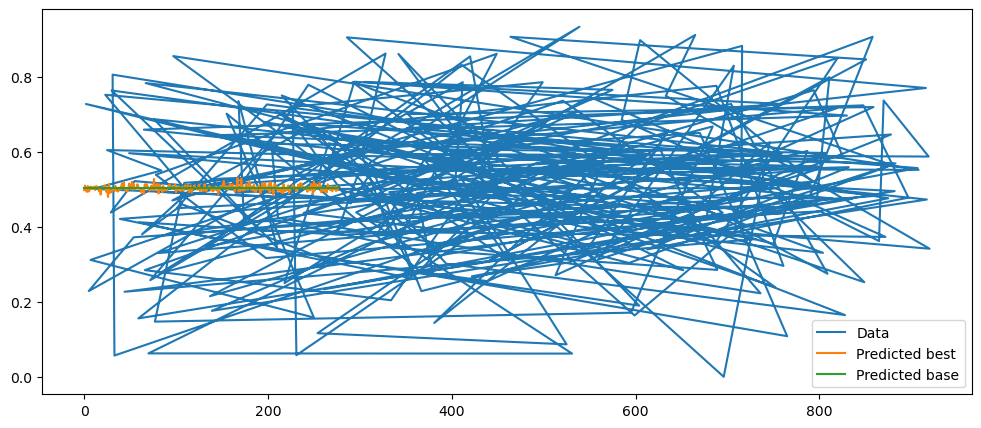

In [20]:
# Сравнение
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_Rm_test, label='Data')
ax.plot(y_Rm_pred_best, label='Predicted best')
ax.plot(y_Rm_pred_base, label='Predicted base')
ax.legend()
plt.show()

In [ ]:
#Линейная регрессия
LinearRegression


In [ ]:
model_LR = LinearRegression()

In [ ]:
model_LR.fit(X_Emod_train, y_Emod_train)

In [ ]:
model_LR.coef_

In [ ]:
pd.DataFrame(model_LR.coef_, X_Emod_train.columns)

In [ ]:
y_Emod_pred = model_LR.predict(X_Emod_test)

In [ ]:
MAE = mean_absolute_error(y_Emod_test, y_Emod_pred)
MSE = mean_squared_error(y_Emod_test, y_Emod_pred)
print(f'MAE = {MAE}')
print(f'MSE = {MSE}')
print(f'MAE / y_Emod_pred.mean() = {MAE / y_Emod_pred.mean()}')

In [ ]:
X_Emod_train, X_Emod_test, y_Emod_train, y_Emod_test = train_test_split(X_Emod, y_Emod, test_size = 0.3, random_state=42)
print(X_Emod_train.shape, X_Emod_test.shape)
print(y_Emod_train.shape, y_Emod_test.shape)

X_Rm_train, X_Rm_test, y_Rm_train, y_Rm_test = train_test_split(X_Rm, y_Rm, test_size = 0.3, random_state=42)
print(X_Rm_train.shape, X_Rm_test.shape)
print(y_Rm_train.shape, y_Rm_test.shape)


In [ ]:
#SVM (метод опорных векторов)
LinearSVR
SVR

In [ ]:
#KNN (метод k-ближайших соседей)
KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

In [ ]:
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_norm)
modelNeihg_2 = KNeighborsRegressor()
modelNeihg_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Neihg_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Neihg_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)
print (R2Neihg_1)
print (R2Neihg_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['KNeighborsRegressor_norm',MAENeihg_1])
MAE_y2.append(['KNeighborsRegressor_norm',MAENeihg_2])
R2_y1.append(['KNeighborsRegressor_norm',R2Neihg_1])
R2_y2.append(['KNeighborsRegressor_norm',R2Neihg_2])

In [ ]:
#Дерево решений
DecisionTreeRegressor

In [ ]:
# модель регрессии DecisionTreeRegressor
modelTree_1 = DecisionTreeRegressor(max_depth=3)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Tree_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Tree_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)
print (R2Tree_1)
print (R2Tree_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['DecisionTreeRegressor_norm',MAETree_1])
MAE_y2.append(['DecisionTreeRegressor_norm',MAETree_2])
R2_y1.append(['DecisionTreeRegressor_norm',R2Tree_1])
R2_y2.append(['DecisionTreeRegressor_norm',R2Tree_2])


In [ ]:
#Random Forest
RandomForestRegressor

In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
rf = GSCV.best_estimator_
rf

In [ ]:
rf = RandomForestRegressor(GSCV.best_params_)
rf

In [ ]:
rf = RandomForestRegressor(criterion='squared_error', max_depth=6, 
                           max_features='auto', n_estimators=500)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
test_predictions = rf.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
rf.predict(X_test)

In [ ]:
np.mean((y_test - np.mean(y_test))*(y_test - np.mean(y_test)))

In [ ]:
prediction=rf.predict(X_test)

In [ ]:
np.mean((y_test - prediction)*(y_test - prediction))

In [ ]:
pd.DataFrame(GSCV.cv_results_)

In [ ]:
plt.hist(pd.DataFrame(GSCV.cv_results_)['mean_test_score'])

In [ ]:
# модель регрессии RandomForestRegressor
modelForest_1 = RandomForestRegressor(max_depth=5)
modelForest_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelForest_1.predict(X_test_norm)

modelForest_2 = RandomForestRegressor(max_depth=5)
modelForest_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelForest_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEForest_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEForest_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Forest_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Forest_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEForest_1)
print (MAEForest_2)
print (R2Forest_1)
print (R2Forest_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['RandomForestRegressor_norm',MAEForest_1])
MAE_y2.append(['RandomForestRegressor_norm',MAEForest_2])
R2_y1.append(['RandomForestRegressor_norm',R2Forest_1])
R2_y2.append(['RandomForestRegressor_norm',R2Forest_2])

In [ ]:
#AdaBoost, или адаптивный бустинг
AdaBoostRegressor

In [ ]:
# модель регрессии AdaBoostRegressor
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_1 = modelAda_1.predict(X_test_norm)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_2 = modelAda_2.predict(X_test_norm)

y_pred = np.vstack((y_pred_1,y_pred_2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Ada_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Ada_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)
print (R2Ada_1)
print (R2Ada_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['AdaBoostRegressor_norm',MAEAda_1])
MAE_y2.append(['AdaBoostRegressor_norm',MAEAda_2])
R2_y1.append(['AdaBoostRegressor_norm',R2Ada_1])
R2_y2.append(['AdaBoostRegressor_norm',R2Ada_2])

In [ ]:
#Gradient Boost и XGBoost
GradientBoostingRegressor

In [ ]:
#Алгоритмы усиления градиента
SGDRegressor

In [ ]:
#Нейросетевая регрессия
MLPRegressor

In [ ]:
#Регрессия LASSO
Lasso

In [ ]:
lassso = Lasso(random_state = 42)
param_grid = {
   'alpha': np.linspace(0, 1, 100)
}
GSCV = GridSearchCV(estimator=lassso, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
model=GSCV.best_estimator_

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
prediction=model.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

In [ ]:
#Гребневая регрессия (ридж-регрессия)
BayesianRidge
Ridge

In [ ]:
#Регрессия ElasticNet
ElasticNet

In [ ]:
#2.3.	Тестирование модели
#В данном разделе показывается ошибка каждой модели на тренировочной и тестирующей части выборки. 
#Обосновывается выбор модели.

# ИНС для Соотношения матрица-наполнитель

In [36]:
# Выделение целевой переменной и разделение на тренировочную и тестовую части
X = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y = df['Соотношение матрица-наполнитель']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(645, 12) (277, 12)
(645,) (277,)


In [ ]:
ANN = 

# Сохранение модели

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score, roc_curve

# метод для рисования ROC-AUC графика
from sklearn.metrics import plot_roc_curve, ConfusionMatrixDisplay

knn_baseline = KNeighborsClassifier()
knn_baseline.fit(x_train, y_train)

y_train_predicted_knn = knn_baseline.predict_proba(x_train)[:, 1]
y_val_predicted_knn = knn_baseline.predict_proba(x_val)[:, 1]

roc_knn_train = roc_auc_score(ya_train, y_train_predicted_knn)
roc_knn_val = roc_auc_score(y_val, y_val_predicted_knn)


####
print(f"ROC AUC на обучающей {roc_knn_train}")
print(f"ROC AUC на тестовой {roc_knn_val}")


display = ConfusionMatrixDisplay.from_estimator(
    knn_baseline,
    x_train,
    y_train,
    cmap=plt.cm.Blues,
)
display.ax_.set_title('Матрица ошибок для обучающей выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')

####
display = ConfusionMatrixDisplay.from_estimator(
    knn_baseline,
    x_val,
    y_val,
    cmap=plt.cm.Blues,
    normalize='true',
)
display.ax_.set_title('Матрица ошибок для валидационной выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

####
tree_baseline = DecisionTreeClassifier()
tree_baseline.fit(x_train, y_train)

y_train_predicted_tree = tree_baseline.predict_proba(x_train)
y_val_predicted_tree = tree_baseline.predict_proba(x_val)

roc_tree_train = roc_auc_score(y_train, y_train_predicted_tree, multi_class='ovr')
roc_tree_val = roc_auc_score(y_val, y_val_predicted_tree, multi_class='ovr')

print(f"ROC AUC на обучающей {roc_tree_train}")
print(f"ROC AUC на тестовой {roc_tree_val}")

####
roc_tree_train = roc_auc_score(y_train, y_train_predicted_tree, multi_class='ovo')
roc_tree_val = roc_auc_score(y_val, y_val_predicted_tree, multi_class='ovo')

print(f"ROC AUC на обучающей {roc_tree_train}")
print(f"ROC AUC на тестовой {roc_tree_val}")

####
display = ConfusionMatrixDisplay.from_estimator(
    tree_baseline,
    x_train,
    y_train,
    cmap=plt.cm.Blues,
)
display.ax_.set_title('Матрица ошибок для обучающей выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')

In [ ]:
# pipeline
# Формулирование проблемы (определение цели, оценка текущей ситуации, подготовка плана)
# Сбор данных (сбор, описание, изучение, проверка качества данных)
# Предобработка данных (выборка, очистка, генерация, интеграция, форматирование)
# Проектирование (выбор алгоритмов), разработка, обучение, тестирование (оценка качества модели) - циклично
# Постобработка результатов (оценка результатов, процесса, определение следующих шагов)
# Введение в эксплуатацию (внедрение, планирование мониторинга и поддержки, подготовка отчета, ревью проекта)
# Решение проблемы

In [ ]:
#Структура базового проекта

#README.md файл с инструкцией для запуска и любой важной информацией
#requirements.txt файл, в котором перечислены все необходимые зависимости
#файлы *. py модули программы

#data папка с наборами данных, включающая в себя папки (можно разбить эти папки на train и test):
    # raw сырые данные, то есть данные в том виде, в котором были получены
    # processed данные после различных преобразований (удаление выбросов, заполнение пропусков и т.д.)
    
#models папка с моделями и их параметрами Внутри может быть создана папка logs с логами обучения

#notebooks папка с «тетрадками»:
    #eda [Exploratory Data Analysis (Data Exploration )]исследование данных.
    #poc [Proof of Concept] проверка концепции. Разработка некоторого прототипа или его частей, которые отражают
                            #основную идею. Проверка осуществимости и применимости различных методов
    #modeling построение модели и ее обучение
    #evaluation оценка качества модели

#src (source code) папка с исходным кодом программы, которая может делиться на следующие подпапки:
    #preparation подготовка данных (выгрузка из базы данных, чтение из файла...). Все, что нужно сделать перед обработкой
    #processing обработка данных: чистка, трансформации, преобразования
    #modeling построение модели
            #В данной структуре удобно создавать файлы utils py (для всяких вспомогательных функций), 
                                                    #  train py (для обучения модели),
                                                    #  predict py (для получения предсказаний)

#test папка с тестами (для кода программы, а не модели!)

In [24]:
pip freeze > ../requirements.txt

Note: you may need to restart the kernel to use updated packages.
